## Тема “Обучение без учителя”

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


#### Импортируем библиотеки, которые будут нужны для выполнения задания

In [168]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### Загружаем данные, с которыми работали на задании 1, в DataFrames

In [190]:
X_train = pd.read_pickle("X_train.pkl")
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


### Приступаем к кластерному анализу

#### Сначала приведем все признаки к одинаковому масштабу

In [191]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

#### Создадим модель с требуемыми параметрами

In [192]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

#### Натренируем модель

In [193]:
train_labels = model.fit_predict(X_train_scaled)

In [194]:
centers = scaler.inverse_transform(model.cluster_centers_)

In [195]:
X_train_scaled['CRIM'][labels_train == 2].mean()

nan

#### Вычислим величину inertia_. В наше примере она довольно большая, что может означать, что 3-х кластеров для наших данных недостаточно

In [196]:
model.inertia_

139.62964521605204

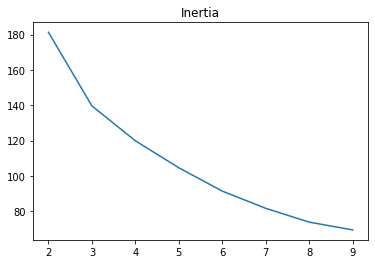

In [197]:
inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(X_train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)

plt.title('Inertia')

plt.show()

#### Согласно следующему пункту задачи, нам надо раскрасить кластеры, полученные по методу t-SNE в разные цвета и подсчитать цену и криминальность в каждом кластере.
Загрузим данные из pkl-файлов, которые были сохранены в задании 1.

In [198]:
X_train_tsne = pd.read_pickle("X_train_tsne.pkl")

#### Построим диаграмму рассеивания для этих данных

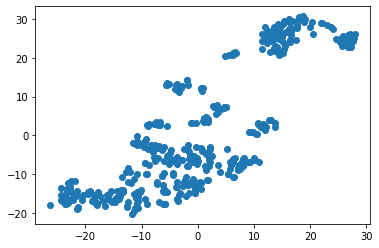

In [179]:
plt.scatter(X_train_tsne['0'], X_train_tsne['1'])

plt.show()

#### Разобьем данные на кластеры и окрасим кластеры в разные цвета

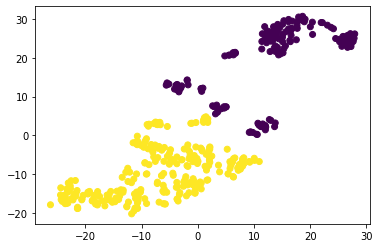

In [199]:
kmeans = KMeans(n_clusters=2)

labels_train = kmeans.fit_predict(X_train_tsne)

plt.scatter(X_train_tsne['0'], X_train_tsne['1'], c=labels_train)

plt.show()

In [200]:
model.inertia_

139.62964521605204

#### Загрузим цены из pkl файла, сохраненного в первом задании и подсчитаем средние
#### в каждом кластере для цены и преступности

In [201]:
y_train=pd.read_pickle("y_train.pkl")

In [202]:
X_train_scaled['CRIM'][labels_train == 0].mean()

0.10210046815865771

In [203]:
X_train_scaled['CRIM'][labels_train == 1].mean()

0.00328821869173734

In [204]:
y_train[labels_train == 0].mean()

17.861184210526314

In [206]:
y_train[labels_train == 1].mean()

25.77341269841271